In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['Face_detection_2.jpg', 'Face_detection_1.jpg', 'Face_detection_3.jpg', 'haarcascade_frontalface_default.xml']


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the Image
image_raw=cv2.imread('../input/Face_detection_1.jpg')

#Converting into Grayscale
image_gray=cv2.cvtColor(image_raw, cv2.COLOR_BGR2GRAY)


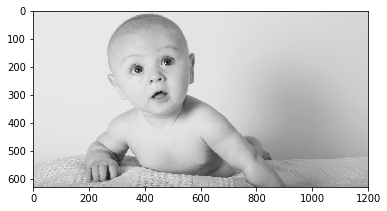

In [4]:
#Displaying the image
plt.imshow(image_gray,cmap='gray')

In [5]:
#Since OPencv loads an image in BGR format so we need to convert it into RGB
def BGR2RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    

In [6]:
#Using Pretrained HaarCascade Classifier
haar_cascade_face=cv2.CascadeClassifier('../input/haarcascade_frontalface_default.xml')

In [7]:
#Some Faces are near the camera so they look prominent than the ones behind. 
#ScaleFactor compensates for that
#minNeighbors specifies the number of neighbors a rectangle should have to be called a face

faces_rect=haar_cascade_face.detectMultiScale(image_gray, scaleFactor = 1.2, minNeighbors = 5);
print("Faces Found: ", len(faces_rect))


Faces Found:  1


In [8]:
#Drawing a green rectangle of thickness 2
for(x,y,w,h) in faces_rect:
    cv2.rectangle(image_raw,(x,y),(x+w,y+h),(0,255,0),2)
    

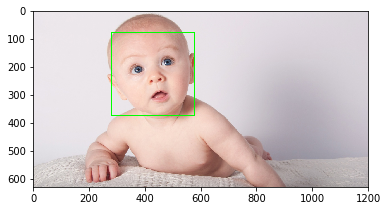

In [9]:
plt.imshow(BGR2RGB(image_raw))

In [10]:
#Defining a function

def detect_faces(cascade, image_raw, scaleFactor = 1.1):
    image_gray = cv2.cvtColor(image_raw, cv2.COLOR_BGR2GRAY)

    faces_rect = cascade.detectMultiScale(image_gray, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_raw, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_raw

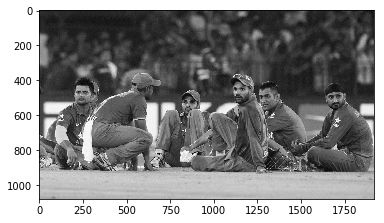

In [11]:
image_raw_3=cv2.imread('../input/Face_detection_3.jpg')
image_gray_3=cv2.cvtColor(image_raw_3,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray_3,cmap='gray')

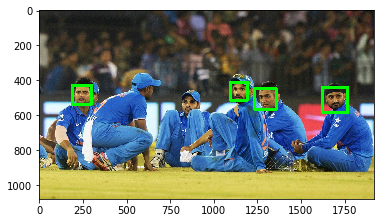

In [12]:
faces=detect_faces(haar_cascade_face,image_raw_3)
plt.imshow(BGR2RGB(faces))